# 한국전력공사 
## dsz data
- dsz data는 한국전력공사가 제공하는 충전소에 한함. (~2019.12.27)

In [68]:
#광역시도코드 / 광역시도명 /시군구코드 / 시군구명 / 설치장소명 / 주소 / 급속충전기대수 / 완속충전기대수 / 위도 / 경도 / 지원차종명

- 공공데이터포털 > 한국전력공사_전기차충전소 위경도 (~2022.07.19)
https://www.data.go.kr/data/15102458/fileData.do
<br>
- 문제 : 급속 ,완속 구분이없고, 시군구코드가 없다...

##  한국전력공사 (df)
> 한국전력공사_지역별 전기차 충전소 현황정보 (~2022.01.11)
https://home.kepco.co.kr/kepco/KE/D/htmlView/KEDDHP040.do?menuCd=FN250301

openAPI
https://bigdata.kepco.co.kr/cmsmain.do

In [69]:
import os
import sys
import urllib.request
import json
import pandas as pd

user_key = 'YjMGr00Esr0zfk7hWWsNERxF2Sa8oZ2kUVK7f3tV'

#서울만 가져옴
url = "https://bigdata.kepco.co.kr/openapi/v1/EVcharge.do?metroCd=11&apiKey="+user_key+"&returnType=json" #JSON, XML
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8')) #json으로 stf > dict로 만들어주기
else:
    print("Error Code:" + rescode)

items = response_dict['data']
df = pd.DataFrame(items)
df.head()

,metro,city,stnPlace,stnAddr,rapidCnt,slowCnt,carType
0,서울특별시,강남구,LH강남힐스테이트,서울특별시 강남구 자곡동 자곡로3길 21,1,4,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
1,서울특별시,강남구,LH서울지사,서울특별시 강남구 선릉로 121길 12,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
2,서울특별시,강남구,가람아파트,서울특별시 강남구 일원동 일원로 127,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
3,서울특별시,강남구,강남구청 공영주차장,서울특별시 강남구 삼성동 16-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
4,서울특별시,강남구,강남데시앙파크,서울특별시 강남구 세곡동 헌릉로590길 63,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."


### 컬럼 정렬 및 추가

- 컬럼 배치<br>

<안심구역 데이터> <br>
광역시도코드 / 광역시도명 /시군구코드 / 시군구명 / 설치장소명 / 주소 / 급속충전기대수 / 완속충전기대수 / 위도 / 경도 / 지원차종명

In [70]:
#부족한 컬럼채우기
df['광역시도코드'] = 1 #광역시도코드
df['시군구코드'] = 1 #시군구코드
df['위도'] =1
df['경도'] =1

#이름 설정
df = df.rename(columns = {'metro':'광역시도명',
                         'city':'시군구명',
                         'stnPlace':'설치장소명',
                         'stnAddr':'주소',
                         'rapidCnt':'급속충전기대수',
                         'slowCnt':'완속충전기대수',
                         'carType':'지원차종명'})

- 컬럼추가 : 총 충전소 수( 급속 + 완속 )

In [71]:
df['충전기대수'] = df['급속충전기대수'] + df['완속충전기대수']
df.head()

,광역시도명,시군구명,설치장소명,주소,급속충전기대수,완속충전기대수,지원차종명,광역시도코드,시군구코드,위도,경도,충전기대수
0,서울특별시,강남구,LH강남힐스테이트,서울특별시 강남구 자곡동 자곡로3길 21,1,4,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",1,1,1,1,5
1,서울특별시,강남구,LH서울지사,서울특별시 강남구 선릉로 121길 12,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",1,1,1,1,1
2,서울특별시,강남구,가람아파트,서울특별시 강남구 일원동 일원로 127,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",1,1,1,1,1
3,서울특별시,강남구,강남구청 공영주차장,서울특별시 강남구 삼성동 16-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",1,1,1,1,1
4,서울특별시,강남구,강남데시앙파크,서울특별시 강남구 세곡동 헌릉로590길 63,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",1,1,1,1,2


In [72]:
#컬럼 순서배치
df = df.reindex(columns = ['광역시도코드','광역시도명','시군구코드','시군구명','설치장소명','주소','급속충전기대수','완속충전기대수','충전기대수','위도','경도','지원차종명'])
df.head()

,광역시도코드,광역시도명,시군구코드,시군구명,설치장소명,주소,급속충전기대수,완속충전기대수,충전기대수,위도,경도,지원차종명
0,1,서울특별시,1,강남구,LH강남힐스테이트,서울특별시 강남구 자곡동 자곡로3길 21,1,4,5,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
1,1,서울특별시,1,강남구,LH서울지사,서울특별시 강남구 선릉로 121길 12,1,0,1,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
2,1,서울특별시,1,강남구,가람아파트,서울특별시 강남구 일원동 일원로 127,1,0,1,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
3,1,서울특별시,1,강남구,강남구청 공영주차장,서울특별시 강남구 삼성동 16-1,1,0,1,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
4,1,서울특별시,1,강남구,강남데시앙파크,서울특별시 강남구 세곡동 헌릉로590길 63,1,1,2,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."


- 공백 데이터 전처리

In [73]:
df[df['시군구명']==' ']

,광역시도코드,광역시도명,시군구코드,시군구명,설치장소명,주소,급속충전기대수,완속충전기대수,충전기대수,위도,경도,지원차종명
618,1,서울특별시,1,,서울특별시은평병원 주차장,서울특별시 은평구 백련산로 90,1,0,1,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
619,1,서울특별시,1,,양재리본타워2단지아파트,서울특별시 서초구 양재동 212,0,4,4,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
620,1,서울특별시,1,,응암3동 공영주차장,"서울특별시 은평구 불광천길 436 (응암동, 응암공영주차장)",1,0,1,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."


In [74]:
df.loc[618,'시군구명'] = "은평구"
df.loc[619,'시군구명'] = "서초구"
df.loc[620,'시군구명'] = "은평구"

In [75]:
df[df['시군구명']==' ']

,광역시도코드,광역시도명,시군구코드,시군구명,설치장소명,주소,급속충전기대수,완속충전기대수,충전기대수,위도,경도,지원차종명


- 파일저장

In [76]:
df.to_excel('elecchargerAPI.xlsx')

### 충전기 대수 정렬

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   광역시도코드   621 non-null    int64 
 1   광역시도명    621 non-null    object
 2   시군구코드    621 non-null    int64 
 3   시군구명     621 non-null    object
 4   설치장소명    621 non-null    object
 5   주소       621 non-null    object
 6   급속충전기대수  621 non-null    int64 
 7   완속충전기대수  621 non-null    int64 
 8   충전기대수    621 non-null    int64 
 9   위도       621 non-null    int64 
 10  경도       621 non-null    int64 
 11  지원차종명    621 non-null    object
dtypes: int64(7), object(5)
memory usage: 58.3+ KB


In [78]:
df_group = df.groupby('시군구명')
df_charger_num = df_group[['급속충전기대수','완속충전기대수','충전기대수','위도']].sum()
df_charger_num

,급속충전기대수,완속충전기대수,충전기대수,위도
시군구명,,,,
강남구,38,81,119,54
강동구,30,56,86,34
강북구,12,16,28,9
강서구,24,43,67,27
관악구,11,17,28,16
광진구,17,18,35,12
구로구,23,52,75,30
금천구,8,2,10,6
노원구,35,62,97,42


In [79]:
#총 충전기대수 정렬
df_total = df_charger_num.sort_values(by='충전기대수', ascending=False)
df_total.reset_index(inplace=True)
df_total

,시군구명,급속충전기대수,완속충전기대수,충전기대수,위도
0,송파구,43,89,132,45
1,서초구,38,83,121,51
2,강남구,38,81,119,54
3,노원구,35,62,97,42
4,마포구,29,68,97,34
5,강동구,30,56,86,34
6,영등포구,25,60,85,25
7,용산구,27,49,76,22
8,구로구,23,52,75,30
9,도봉구,27,44,71,35


In [80]:
#급속기준 정렬
df_fast = df_charger_num.sort_values(by='급속충전기대수', ascending=False)
df_fast.reset_index(inplace=True)
df_fast

,시군구명,급속충전기대수,완속충전기대수,충전기대수,위도
0,송파구,43,89,132,45
1,강남구,38,81,119,54
2,서초구,38,83,121,51
3,성동구,36,30,66,18
4,노원구,35,62,97,42
5,중구,31,22,53,19
6,강동구,30,56,86,34
7,마포구,29,68,97,34
8,성북구,27,42,69,25
9,도봉구,27,44,71,35


In [81]:
#완속기준 정렬
df_slow = df_charger_num.sort_values(by='완속충전기대수', ascending=False)
df_slow.reset_index(inplace=True)
df_slow

,시군구명,급속충전기대수,완속충전기대수,충전기대수,위도
0,송파구,43,89,132,45
1,서초구,38,83,121,51
2,강남구,38,81,119,54
3,마포구,29,68,97,34
4,노원구,35,62,97,42
5,영등포구,25,60,85,25
6,강동구,30,56,86,34
7,구로구,23,52,75,30
8,용산구,27,49,76,22
9,도봉구,27,44,71,35


# 환경부 산하기관(한국수자원공사) (df4)
전국 전기차 충전소 데이터 (~2021.12.21)

https://www.bigdata-environment.kr/user/data_market/detail.do?id=2081f250-b235-11eb-bc66-992d9417bbde#!

## 컬럼 정렬 및 추가

In [82]:
%pwd

'C:\\cakd7\\github\\데이터안심구역_팀\\teamproject'

In [83]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df2 = pd.read_csv('electricchargerall.csv')

In [84]:
df2.columns

Index(['stat_nm', 'stat_id', 'chger_id', 'chger_type', 'addr', 'lat', 'lon',
       'use_time', 'busi_id', 'busi_nm', 'busi_call', 'chger_stat',
       'stat_upd_dt', 'power_type', 'city_do_cd', 'parking_free_yn',
       'stat_note', 'limit_yn', 'limit_detail', 'del_yn', 'del_detail'],
      dtype='object')

In [85]:
#한글 컬럼명으로 변환
df2 = df2.rename(columns = {'stat_nm':'충전소명',
                    'stat_id':'충전소ID',
                    'chger_id':'충전기ID',
                    'chger_type':'충전기타입',
                    'addr':'주소',
                    'lat':'위도',
                    'lon':'경도',
                    'use_time':'이용가능시간',
                    'busi_id':'기관아이디',
                    'busi_nm':'운영기관명',
                    'busi_call':'운영기관 연락처',
                    'chger_stat':'충전기상태',
                    'stat_upd_dt':'상태갱신일시',
                    'power_type':'충전량유형',
                    'city_do_cd':'시도코드',
                    'parking_free_yn':'주차료무료여부',
                    'stat_note':'충전소안내',
                    'limit_yn':'이용자제한여부',
                    'limit_detail':'이용제한사유',
                    'del_yn':'삭제여부',
                    'del_detail':'삭제사유'})
df2.head()

,충전소명,충전소ID,충전기ID,충전기타입,주소,위도,경도,이용가능시간,기관아이디,운영기관명,...,충전기상태,상태갱신일시,충전량유형,시도코드,주차료무료여부,충전소안내,이용자제한여부,이용제한사유,삭제여부,삭제사유
0,종묘 공영주차장,ME000001,1,3,서울특별시 종로구 종로 157,37.571076,126.995880,24시간 이용가능,ME,환경부,...,9,2.021110e+13,NaN,11,Y,NaN,N,NaN,N,NaN
1,세종로 공영주차장,ME000002,1,6,서울특별시 종로구 세종대로 189,37.573611,126.976011,24시간 이용가능,ME,환경부,...,9,2.021080e+13,NaN,11,Y,NaN,N,NaN,N,NaN
2,그랜드앰배서더 서울,ME000003,1,6,서울특별시 중구 동호로 287,37.559352,127.002350,24시간 이용가능,ME,환경부,...,9,2.021090e+13,NaN,11,N,NaN,N,NaN,N,NaN
3,한강진역 공영주차장,ME000004,1,3,서울특별시 용산구 한남동 산10-84,37.540085,127.002804,24시간 이용가능,ME,환경부,...,9,2.021090e+13,NaN,11,Y,NaN,N,NaN,N,NaN
4,기아차 성동서비스센터,ME000005,1,3,서울특별시 성동구 성수이로26길 61,37.544834,127.064226,24시간 이용가능,ME,환경부,...,9,2.021070e+13,NaN,11,N,20190626 공사로 인한 임시철거,Y,20190626 공사로 인한 임시철거,N,NaN


- 필요컬럼 뽑기 <br>
<한전데이터> <br>
['광역시도코드','광역시도명','시군구코드','시군구명','설치장소명','주소','급속충전기대수','완속충전기대수','위도','경도','지원차종명','충전기대수']

In [86]:
df2.to_csv('electricchargeseoul.csv')

In [87]:
#서울만 뽑기 - 시도코드=11 #총13388
df2 = df2[df2['시도코드']==11]
#인덱스정렬
df2.reset_index(inplace=True)
df2

,index,충전소명,충전소ID,충전기ID,충전기타입,주소,위도,경도,이용가능시간,기관아이디,...,충전기상태,상태갱신일시,충전량유형,시도코드,주차료무료여부,충전소안내,이용자제한여부,이용제한사유,삭제여부,삭제사유
0,0,종묘 공영주차장,ME000001,1,3,서울특별시 종로구 종로 157,37.571076,126.995880,24시간 이용가능,ME,...,9,2.021110e+13,NaN,11,Y,NaN,N,NaN,N,NaN
1,1,세종로 공영주차장,ME000002,1,6,서울특별시 종로구 세종대로 189,37.573611,126.976011,24시간 이용가능,ME,...,9,2.021080e+13,NaN,11,Y,NaN,N,NaN,N,NaN
2,2,그랜드앰배서더 서울,ME000003,1,6,서울특별시 중구 동호로 287,37.559352,127.002350,24시간 이용가능,ME,...,9,2.021090e+13,NaN,11,N,NaN,N,NaN,N,NaN
3,3,한강진역 공영주차장,ME000004,1,3,서울특별시 용산구 한남동 산10-84,37.540085,127.002804,24시간 이용가능,ME,...,9,2.021090e+13,NaN,11,Y,NaN,N,NaN,N,NaN
4,4,기아차 성동서비스센터,ME000005,1,3,서울특별시 성동구 성수이로26길 61,37.544834,127.064226,24시간 이용가능,ME,...,9,2.021070e+13,NaN,11,N,20190626 공사로 인한 임시철거,Y,20190626 공사로 인한 임시철거,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13383,88310,삼성전자 서초사옥,TDA00018,4,2,서울특별시 서초구 서초대로74길 11,37.496633,127.026915,05:00~24:00,TD,...,2,2.021110e+13,NaN,11,Y,NaN,Y,거주자외 사용제한,N,NaN
13384,88311,삼성전자 서초사옥,TDA00018,5,2,서울특별시 서초구 서초대로74길 11,37.496633,127.026915,05:00~24:00,TD,...,2,2.021110e+13,NaN,11,Y,NaN,Y,거주자외 사용제한,N,NaN
13385,88312,삼성전자 서초사옥,TDA00018,6,2,서울특별시 서초구 서초대로74길 11,37.496633,127.026915,05:00~24:00,TD,...,9,NaN,NaN,11,Y,NaN,Y,거주자외 사용제한,N,NaN
13386,88313,삼성전자 서초사옥,TDA00018,7,2,서울특별시 서초구 서초대로74길 11,37.496633,127.026915,05:00~24:00,TD,...,2,2.021110e+13,NaN,11,Y,NaN,Y,거주자외 사용제한,N,NaN


In [88]:
#컬럼선택
df2 =df2[['충전소명','충전기타입','주소','위도','경도','운영기관명','시도코드']]
#컬럼명 변경
df2.rename(columns = {'시도코드':'광역시도코드',
                     '충전소명':'설치장소명',},inplace=True)

#컬럼추가
df2['광역시도명'] = '서울특별시'
df2['시군구코드'] = 1
df2['시군구명'] = 1
df2['급속충전기대수'] = 0
df2['완속충전기대수'] = 0
df2['급속완속충전기대수'] = 0
df2['지원차종명'] = 1

## 주소 결측치, 구 설정

- 주소 null 값

In [89]:
#null값 확인 
df2.info()

#주소에 null값 존재
df2[df2['주소'].isnull()==True]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13388 entries, 0 to 13387
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   설치장소명      13388 non-null  object 
 1   충전기타입      13388 non-null  int64  
 2   주소         13379 non-null  object 
 3   위도         13388 non-null  float64
 4   경도         13388 non-null  float64
 5   운영기관명      13388 non-null  object 
 6   광역시도코드     13388 non-null  int64  
 7   광역시도명      13388 non-null  object 
 8   시군구코드      13388 non-null  int64  
 9   시군구명       13388 non-null  int64  
 10  급속충전기대수    13388 non-null  int64  
 11  완속충전기대수    13388 non-null  int64  
 12  급속완속충전기대수  13388 non-null  int64  
 13  지원차종명      13388 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.4+ MB


,설치장소명,충전기타입,주소,위도,경도,운영기관명,광역시도코드,광역시도명,시군구코드,시군구명,급속충전기대수,완속충전기대수,급속완속충전기대수,지원차종명
99,롯데 VIC마켓 금천점,6,NaN,37.470581,126.895698,환경부,11,서울특별시,1,1,0,0,0,1
100,롯데 VIC마켓 금천점,6,NaN,37.470581,126.895698,환경부,11,서울특별시,1,1,0,0,0,1
151,이마트 은평점,6,NaN,37.600770,126.920490,환경부,11,서울특별시,1,1,0,0,0,1
269,가락시장,4,NaN,37.494161,127.113843,환경부,11,서울특별시,1,1,0,0,0,1
270,가락시장,4,NaN,37.494161,127.113843,환경부,11,서울특별시,1,1,0,0,0,1
271,가락시장,4,NaN,37.494161,127.113843,환경부,11,서울특별시,1,1,0,0,0,1
272,가락시장,4,NaN,37.494161,127.113843,환경부,11,서울특별시,1,1,0,0,0,1
273,가락시장,4,NaN,37.494161,127.113843,환경부,11,서울특별시,1,1,0,0,0,1
274,가락시장,4,NaN,37.494161,127.113843,환경부,11,서울특별시,1,1,0,0,0,1


In [90]:
df2.loc[99:101,'주소'] = '서울 금천구 두산로 71'
df2.loc[151,'주소'] = '서울 은평구 은평로 111'
#가락시장은 가락농수산물종합도매시장으로 검색했음 
df2.loc[269:275,'주소'] = '서울 송파구 양재대로 932'

df2[df2['주소'].isnull()==True]

,설치장소명,충전기타입,주소,위도,경도,운영기관명,광역시도코드,광역시도명,시군구코드,시군구명,급속충전기대수,완속충전기대수,급속완속충전기대수,지원차종명


- 이상한 주소 (ex.옥상..)

In [91]:
keywords =['서울특별시', '서울']

for i in range(len(add)):
    if any(keyword in df2.loc[i,'주소'] for keyword in keywords)==False:
        print(i, df2.loc[i,'설치장소명':'주소']) #index 추출

57 설치장소명       보라매 제1공영주차장
충전기타입                 6
주소        입구좌측, 지하 각 1기
Name: 57, dtype: object
68 설치장소명    공덕1-1공영주차장
충전기타입             6
주소               옥상
Name: 68, dtype: object
174 설치장소명    구파발광역환승센터 주차장
충전기타입                4
주소               지상 3층
Name: 174, dtype: object
175 설치장소명    구파발광역환승센터 주차장
충전기타입                4
주소               지상 3층
Name: 175, dtype: object


In [92]:
#보라매 제1공영주차장
df2.loc[57,'주소'] ='서울특별시 관악구 봉천로21길 38'
#공덕1-1공영주차장
df2.loc[68,'주소'] ='서울특별시 마포구 효창목길 31'
#구파발광역환승센터 주차장
df2.loc[174:176,'주소'] ='서울특별시 은평구 진관동 68-5'

In [93]:
keywords =['서울특별시', '서울']

for i in range(len(add)):
    if any(keyword in df2.loc[i,'주소'] for keyword in keywords)==False:
        print(i, df2.loc[i,'설치장소명':'주소']) #index 추출

- 구 설정

In [94]:
add = df2['주소'].to_list()

In [95]:
import re
for i in range(len(add)):
    m =re.search('\w+구',add[i])    
    df2.loc[i,'시군구명'] = m.group()

# type(val)

In [96]:
len(df2['시군구명'].unique())

25

## 급속, 완속 분류

> 충전기 타입 <br>
1) 급속 <br>
01:DC차데모 / 03: DC차데모+AC3상(급속) / 04: DC콤보,05: DC차데모+DC콤보 /06: DC차데모+AC3상+DC콤보 <br>
2) 완속 <br>
02: AC완속 <br>
3) 완속, 급속 <br>
07: AC3상(급속+완속)	<br>

> 전기차 충전기 종류 <br> 
https://tago.kr/story/charger.htm <br>
http://wiki.hash.kr/index.php/%EC%B0%A8%EB%8D%B0%EB%AA%A8 <BR>
> 급속충전기(DC-직류), 완속충전기(AC)

In [97]:
df2['충전기타입'].unique()

array([3, 6, 4, 5, 2, 7, 1], dtype=int64)

In [98]:
for ind, val in enumerate(df2['충전기타입']):
    if val in (1,3,4,5,6):
        df2.loc[ind,'급속충전기대수'] = 1
    elif val == 2:
        df2.loc[ind,'완속충전기대수']= 1
    elif val==7:
         df2.loc[ind,'급속완속충전기대수']= 1

## df4
- df2 > 원래 데이터
- df3 > '설치장소명'으로 그룹화 한 데이터

- 주소별로 합산

In [99]:
df3 = df2.copy()

In [100]:
df3 = df3.groupby('설치장소명')['급속충전기대수','완속충전기대수','급속완속충전기대수'].sum()
df3

,급속충전기대수,완속충전기대수,급속완속충전기대수
설치장소명,,,
(사)국가안보전략연구원,0,1,0
(사)한국전기자동차협회,0,2,0
(주)농협유통창동농산물종합,0,10,0
(주)대신증권,0,2,0
(주)비트플러스,0,5,0
...,...,...,...
힐스테이트에코마곡역_01,0,7,0
힐스테이트에코마곡역_02,0,3,0
힐스테이트청계,1,0,0


In [101]:
df2 = df2[['설치장소명', '충전기타입', '주소', '위도', '경도', '운영기관명', '광역시도코드', '광역시도명', '시군구코드','시군구명', '지원차종명']]
df2['설치장소명'].duplicated()
df2.drop_duplicates(subset=['설치장소명'],inplace=True)
#인덱스 정렬
df2.reset_index(inplace=True, drop=True)
print(len(df2))
df2.head()

3934


,설치장소명,충전기타입,주소,위도,경도,운영기관명,광역시도코드,광역시도명,시군구코드,시군구명,지원차종명
0,종묘 공영주차장,3,서울특별시 종로구 종로 157,37.571076,126.995880,환경부,11,서울특별시,1,종로구,1
1,세종로 공영주차장,6,서울특별시 종로구 세종대로 189,37.573611,126.976011,환경부,11,서울특별시,1,종로구,1
2,그랜드앰배서더 서울,6,서울특별시 중구 동호로 287,37.559352,127.002350,환경부,11,서울특별시,1,중구,1
3,한강진역 공영주차장,3,서울특별시 용산구 한남동 산10-84,37.540085,127.002804,환경부,11,서울특별시,1,용산구,1
4,기아차 성동서비스센터,3,서울특별시 성동구 성수이로26길 61,37.544834,127.064226,환경부,11,서울특별시,1,성동구,1


In [102]:
df3.reset_index(inplace=True)
print(len(df3))
df3.head()

3934


,설치장소명,급속충전기대수,완속충전기대수,급속완속충전기대수
0,(사)국가안보전략연구원,0,1,0
1,(사)한국전기자동차협회,0,2,0
2,(주)농협유통창동농산물종합,0,10,0
3,(주)대신증권,0,2,0
4,(주)비트플러스,0,5,0


In [103]:
df4 = pd.merge(df2,df3, on='설치장소명', how='right')
df4

,설치장소명,충전기타입,주소,위도,경도,운영기관명,광역시도코드,광역시도명,시군구코드,시군구명,지원차종명,급속충전기대수,완속충전기대수,급속완속충전기대수
0,(사)국가안보전략연구원,2,서울특별시 강남구 언주로 120,37.486760,127.051274,차지비,11,서울특별시,1,강남구,1,0,1,0
1,(사)한국전기자동차협회,2,서울특별시 서초구 서초대로25길 20-4,37.488842,126.994160,(주)클린일렉스,11,서울특별시,1,서초구,1,0,2,0
2,(주)농협유통창동농산물종합,2,서울특별시 도봉구 마들로11길 20,37.655038,127.051803,이카플러그,11,서울특별시,1,도봉구,1,0,10,0
3,(주)대신증권,2,서울특별시 중구 삼일대로 343,37.565508,126.987330,에스트래픽,11,서울특별시,1,중구,1,0,2,0
4,(주)비트플러스,2,"서울특별시 성동구 왕십리광장로 17 (행당동, 왕십리민자역사)",37.561300,127.038000,차지비,11,서울특별시,1,성동구,1,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,힐스테이트에코마곡역_01,2,서울특별시 강서구 마곡중앙로 76,37.556941,126.824960,(주)클린일렉스,11,서울특별시,1,강서구,1,0,7,0
3930,힐스테이트에코마곡역_02,2,서울특별시 강서구 마곡중앙로 76,37.556941,126.824960,(주)클린일렉스,11,서울특별시,1,강서구,1,0,3,0
3931,힐스테이트청계,6,서울특별시 동대문구 답십리동 465-18,37.571543,127.045904,한국전기차충전서비스,11,서울특별시,1,동대문구,1,1,0,0
3932,힐스테이트청계아파트,2,서울특별시 동대문구 천호대로55길 11,37.571299,127.047808,(주)클린일렉스,11,서울특별시,1,동대문구,1,0,4,0


In [104]:
#충전기대수
df4['충전기대수'] = df4['급속충전기대수'] + df4['완속충전기대수']
df4

,설치장소명,충전기타입,주소,위도,경도,운영기관명,광역시도코드,광역시도명,시군구코드,시군구명,지원차종명,급속충전기대수,완속충전기대수,급속완속충전기대수,충전기대수
0,(사)국가안보전략연구원,2,서울특별시 강남구 언주로 120,37.486760,127.051274,차지비,11,서울특별시,1,강남구,1,0,1,0,1
1,(사)한국전기자동차협회,2,서울특별시 서초구 서초대로25길 20-4,37.488842,126.994160,(주)클린일렉스,11,서울특별시,1,서초구,1,0,2,0,2
2,(주)농협유통창동농산물종합,2,서울특별시 도봉구 마들로11길 20,37.655038,127.051803,이카플러그,11,서울특별시,1,도봉구,1,0,10,0,10
3,(주)대신증권,2,서울특별시 중구 삼일대로 343,37.565508,126.987330,에스트래픽,11,서울특별시,1,중구,1,0,2,0,2
4,(주)비트플러스,2,"서울특별시 성동구 왕십리광장로 17 (행당동, 왕십리민자역사)",37.561300,127.038000,차지비,11,서울특별시,1,성동구,1,0,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,힐스테이트에코마곡역_01,2,서울특별시 강서구 마곡중앙로 76,37.556941,126.824960,(주)클린일렉스,11,서울특별시,1,강서구,1,0,7,0,7
3930,힐스테이트에코마곡역_02,2,서울특별시 강서구 마곡중앙로 76,37.556941,126.824960,(주)클린일렉스,11,서울특별시,1,강서구,1,0,3,0,3
3931,힐스테이트청계,6,서울특별시 동대문구 답십리동 465-18,37.571543,127.045904,한국전기차충전서비스,11,서울특별시,1,동대문구,1,1,0,0,1
3932,힐스테이트청계아파트,2,서울특별시 동대문구 천호대로55길 11,37.571299,127.047808,(주)클린일렉스,11,서울특별시,1,동대문구,1,0,4,0,4


- 최종데이터

In [105]:
df4.columns

Index(['설치장소명', '충전기타입', '주소', '위도', '경도', '운영기관명', '광역시도코드', '광역시도명', '시군구코드',
       '시군구명', '지원차종명', '급속충전기대수', '완속충전기대수', '급속완속충전기대수', '충전기대수'],
      dtype='object')

In [106]:
df4=df4.reindex(columns =['광역시도코드','광역시도명','시군구코드','시군구명','설치장소명','주소','급속충전기대수','완속충전기대수','충전기대수','위도','경도','지원차종명'])
df4.head()

,광역시도코드,광역시도명,시군구코드,시군구명,설치장소명,주소,급속충전기대수,완속충전기대수,충전기대수,위도,경도,지원차종명
0,11,서울특별시,1,강남구,(사)국가안보전략연구원,서울특별시 강남구 언주로 120,0,1,1,37.486760,127.051274,1
1,11,서울특별시,1,서초구,(사)한국전기자동차협회,서울특별시 서초구 서초대로25길 20-4,0,2,2,37.488842,126.994160,1
2,11,서울특별시,1,도봉구,(주)농협유통창동농산물종합,서울특별시 도봉구 마들로11길 20,0,10,10,37.655038,127.051803,1
3,11,서울특별시,1,중구,(주)대신증권,서울특별시 중구 삼일대로 343,0,2,2,37.565508,126.987330,1
4,11,서울특별시,1,성동구,(주)비트플러스,"서울특별시 성동구 왕십리광장로 17 (행당동, 왕십리민자역사)",0,5,5,37.561300,127.038000,1


# df_final (df + df4)

In [153]:
df_final = pd.concat([df,df4],axis=0)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4555 entries, 0 to 3933
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   광역시도코드   4555 non-null   int64  
 1   광역시도명    4555 non-null   object 
 2   시군구코드    4555 non-null   int64  
 3   시군구명     4555 non-null   object 
 4   설치장소명    4555 non-null   object 
 5   주소       4555 non-null   object 
 6   급속충전기대수  4555 non-null   int64  
 7   완속충전기대수  4555 non-null   int64  
 8   충전기대수    4555 non-null   int64  
 9   위도       4555 non-null   float64
 10  경도       4555 non-null   float64
 11  지원차종명    4555 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 462.6+ KB


- 중복검사

In [154]:
#case1 - 전부중복 > 578행
duple_ind = list(df_final[(df_final['설치장소명'].duplicated() == True) & (df_final['급속충전기대수'].duplicated() == True) & (df_final['완속충전기대수'].duplicated() == True)].index)
print(type(duple_ind), len(duple_ind))
duple_ind

<class 'list'> 578


[17,
 19,
 20,
 52,
 70,
 73,
 75,
 77,
 78,
 119,
 120,
 121,
 132,
 138,
 139,
 141,
 142,
 175,
 178,
 180,
 182,
 183,
 187,
 188,
 190,
 201,
 203,
 206,
 212,
 213,
 214,
 216,
 224,
 226,
 229,
 234,
 236,
 237,
 239,
 241,
 242,
 246,
 247,
 249,
 254,
 259,
 279,
 281,
 282,
 283,
 290,
 294,
 301,
 310,
 312,
 319,
 322,
 324,
 327,
 329,
 333,
 335,
 339,
 350,
 351,
 352,
 354,
 355,
 356,
 357,
 358,
 360,
 361,
 363,
 369,
 378,
 379,
 381,
 382,
 383,
 386,
 397,
 400,
 403,
 406,
 411,
 415,
 419,
 421,
 425,
 426,
 431,
 434,
 438,
 439,
 447,
 448,
 453,
 456,
 469,
 486,
 507,
 508,
 509,
 516,
 534,
 538,
 540,
 550,
 560,
 561,
 564,
 566,
 568,
 569,
 570,
 571,
 581,
 582,
 586,
 587,
 608,
 609,
 616,
 618,
 646,
 649,
 653,
 654,
 658,
 664,
 666,
 667,
 681,
 683,
 684,
 686,
 689,
 692,
 697,
 702,
 707,
 708,
 715,
 719,
 721,
 726,
 734,
 735,
 739,
 745,
 748,
 761,
 780,
 782,
 784,
 795,
 796,
 809,
 811,
 812,
 814,
 816,
 819,
 825,
 827,
 833,
 836,
 

In [155]:
#삭제
df_final.drop(duple_ind, inplace=True)
#재정렬
df_final.reset_index(drop=True, inplace=True)
#확인
df_final.info()
df_final[(df_final['설치장소명'].duplicated() == True) & (df_final['급속충전기대수'].duplicated() == True) & (df_final['완속충전기대수'].duplicated() == True)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3852 entries, 0 to 3851
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   광역시도코드   3852 non-null   int64  
 1   광역시도명    3852 non-null   object 
 2   시군구코드    3852 non-null   int64  
 3   시군구명     3852 non-null   object 
 4   설치장소명    3852 non-null   object 
 5   주소       3852 non-null   object 
 6   급속충전기대수  3852 non-null   int64  
 7   완속충전기대수  3852 non-null   int64  
 8   충전기대수    3852 non-null   int64  
 9   위도       3852 non-null   float64
 10  경도       3852 non-null   float64
 11  지원차종명    3852 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 361.2+ KB


,광역시도코드,광역시도명,시군구코드,시군구명,설치장소명,주소,급속충전기대수,완속충전기대수,충전기대수,위도,경도,지원차종명


In [156]:
#case2 - 설치장소명만 중복 > 신규 충전소 추가설치 >3행
df_final[df_final['설치장소명'].duplicated() == True]

,광역시도코드,광역시도명,시군구코드,시군구명,설치장소명,주소,급속충전기대수,완속충전기대수,충전기대수,위도,경도,지원차종명
620,11,서울특별시,1,송파구,가락시장,서울 송파구 양재대로 932,9,0,9,37.494161,127.113843,1
726,11,서울특별시,1,송파구,갤러리아팰리스,서울특별시 송파구 잠실동 40,1,31,32,37.511529,127.094596,1
1260,11,서울특별시,1,송파구,레이크팰리스,서울특별시 송파구 잠실동 잠실로 88,2,48,50,37.507534,127.093213,1


In [157]:
df_final[df_final['설치장소명'] == '가락시장'] #급속 6개추가
df_final.drop([345],inplace=True)

In [158]:
df_final[df_final['설치장소명'] == '갤러리아팰리스'] #완속 28개추가
df_final.drop([348],inplace=True)

In [159]:
df_final[df_final['설치장소명'] == '레이크팰리스'] #완속 42개추가
df_final.drop([352],inplace=True)

In [161]:
#확인
df_final[df_final['설치장소명'].duplicated() == True]
#재정렬
df_final.reset_index(drop=True,inplace=True)

- 최종데이터

In [162]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   광역시도코드   3849 non-null   int64  
 1   광역시도명    3849 non-null   object 
 2   시군구코드    3849 non-null   int64  
 3   시군구명     3849 non-null   object 
 4   설치장소명    3849 non-null   object 
 5   주소       3849 non-null   object 
 6   급속충전기대수  3849 non-null   int64  
 7   완속충전기대수  3849 non-null   int64  
 8   충전기대수    3849 non-null   int64  
 9   위도       3849 non-null   float64
 10  경도       3849 non-null   float64
 11  지원차종명    3849 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 361.0+ KB


In [163]:
df_final.head()

,광역시도코드,광역시도명,시군구코드,시군구명,설치장소명,주소,급속충전기대수,완속충전기대수,충전기대수,위도,경도,지원차종명
0,1,서울특별시,1,강남구,LH강남힐스테이트,서울특별시 강남구 자곡동 자곡로3길 21,1,4,5,1.0,1.0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
1,1,서울특별시,1,강남구,LH서울지사,서울특별시 강남구 선릉로 121길 12,1,0,1,1.0,1.0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
2,1,서울특별시,1,강남구,가람아파트,서울특별시 강남구 일원동 일원로 127,1,0,1,1.0,1.0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
3,1,서울특별시,1,강남구,강남구청 공영주차장,서울특별시 강남구 삼성동 16-1,1,0,1,1.0,1.0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
4,1,서울특별시,1,강남구,강남데시앙파크,서울특별시 강남구 세곡동 헌릉로590길 63,1,1,2,1.0,1.0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."


- 최종데이터 내보내기

In [164]:
df_final.to_excel('elecchargefinal.xlsx')

## 충전기 대수 정렬

In [111]:
df_group = df_final.groupby('시군구명')
df_charger_num = df_group[['급속충전기대수','완속충전기대수','충전기대수','위도']].sum()
df_charger_num

,급속충전기대수,완속충전기대수,충전기대수,위도
시군구명,,,,
강남구,130,794,924,9016.447645
강동구,80,332,412,3638.656884
강북구,20,202,222,2529.954887
강서구,81,744,825,8435.531220
관악구,27,347,374,2976.821571
광진구,30,194,224,2673.211436
구로구,58,632,690,5744.357274
금천구,66,436,502,4612.652647
노원구,64,449,513,4893.264562


In [112]:
#총 충전기대수 정렬
df_total = df_charger_num.sort_values(by='충전기대수', ascending=False)
df_total.reset_index(inplace=True)
df_total

,시군구명,급속충전기대수,완속충전기대수,충전기대수,위도
0,서초구,109,855,964,9536.000114
1,강남구,130,794,924,9016.447645
2,송파구,107,738,845,6078.046388
3,강서구,81,744,825,8435.531220
4,구로구,58,632,690,5744.357274
5,성동구,90,600,690,5425.432789
6,성북구,44,593,637,5618.740637
7,영등포구,89,512,601,5792.297516
8,마포구,67,522,589,5738.143796
9,양천구,63,516,579,5127.031927


In [113]:
#급속기준 정렬
df_fast = df_charger_num.sort_values(by='급속충전기대수', ascending=False)
df_fast.reset_index(inplace=True)
df_fast

,시군구명,급속충전기대수,완속충전기대수,충전기대수,위도
0,강남구,130,794,924,9016.447645
1,서초구,109,855,964,9536.000114
2,송파구,107,738,845,6078.046388
3,중구,104,295,399,4179.324284
4,성동구,90,600,690,5425.432789
5,영등포구,89,512,601,5792.297516
6,강서구,81,744,825,8435.531220
7,강동구,80,332,412,3638.656884
8,마포구,67,522,589,5738.143796
9,금천구,66,436,502,4612.652647


In [114]:
#완속기준 정렬
df_slow = df_charger_num.sort_values(by='완속충전기대수', ascending=False)
df_slow.reset_index(inplace=True)
df_slow

,시군구명,급속충전기대수,완속충전기대수,충전기대수,위도
0,서초구,109,855,964,9536.000114
1,강남구,130,794,924,9016.447645
2,강서구,81,744,825,8435.531220
3,송파구,107,738,845,6078.046388
4,구로구,58,632,690,5744.357274
5,성동구,90,600,690,5425.432789
6,성북구,44,593,637,5618.740637
7,마포구,67,522,589,5738.143796
8,양천구,63,516,579,5127.031927
9,영등포구,89,512,601,5792.297516


- 총 충전기 대수 상위5지역 vs 하위5지역

In [115]:
top = df_total.head(5)
top.set_index('시군구명',inplace=True)
bottom = df_total.tail(5)
bottom.set_index('시군구명',inplace=True)

print(top)
print(bottom)

      급속충전기대수  완속충전기대수  충전기대수           위도
시군구명                                      
서초구       109      855    964  9536.000114
강남구       130      794    924  9016.447645
송파구       107      738    845  6078.046388
강서구        81      744    825  8435.531220
구로구        58      632    690  5744.357274
      급속충전기대수  완속충전기대수  충전기대수           위도
시군구명                                      
서대문구       29      327    356  4370.526549
도봉구        54      267    321  3061.996866
종로구        47      246    293  2833.252815
광진구        30      194    224  2673.211436
강북구        20      202    222  2529.954887


['NanumGothic']


<AxesSubplot:xlabel='시군구명'>

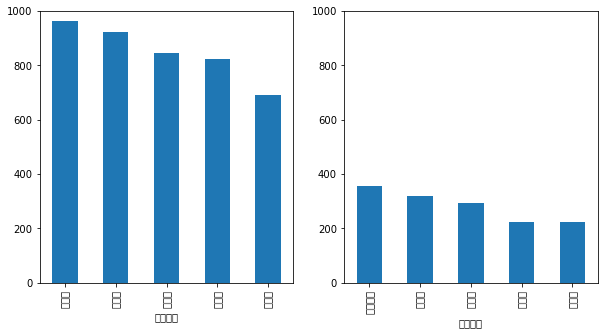

In [165]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.ylim([0,1000])
top['충전기대수'].plot(kind='bar')

plt.subplot(1,2,2)
plt.ylim([0,1000])
bottom['충전기대수'].plot(kind='bar')

# 행정안전부
전기차 충전소 데이터
https://www.data.go.kr/data/15101898/openapi.do <br>

1PUGYUKR-1PUG-1PUG-1PUG-1PUGYUKRA0

In [117]:
import os
import sys
import urllib.request
import json
import pandas as pd

user_key = '1PUGYUKR-1PUG-1PUG-1PUG-1PUGYUKRA0'

url= "http://www.safemap.go.kr/legend/legendApiXml.do?apikey="+ user_key + "&layer=A2SM_CHARGINGSTATION&style=A2SM_CHARGINGSTATION"

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
response_body = response.read()
# response_dict = json.loads(response_body.decode('utf-8')) #json으로 stf > dict로 만들어주기

# items = response_dict['data']
# df = pd.DataFrame(items)
# df.head()

In [118]:
response_body
response_body.decode('utf-8')

'<?xml version="1.0" encoding="utf-8"?>\r\n\r\n\r\n\r\n\r\n\r\n\r\n<data>\r\n\t<legend>\r\n\t\r\n\t\t<LAYER>A2SM_CHARGINGSTATION</LAYER>\r\n\t\t<STYLE>A2SM_CHARGINGSTATION</STYLE>\r\n\t\t\r\n\t\t\r\n\t\t<CATEGORY>안전시설</CATEGORY>\r\n\t\t\r\n\t\t<NAME>전기충전소</NAME>\r\n\t\t<STDRDE>2021년 3월</STDRDE>\r\n\t\t<PROVIDE>한국환경공단</PROVIDE>\r\n\t\t<WARN></WARN>\r\n\t\t<HELP></HELP>\r\n\t\t<DETAIL>\r\n\t\t\r\n\t\t\t<item>\r\n\t\t\t\t\r\n\t\t\t\t<IMG_NM>poi20.png</IMG_NM>\r\n\t\t\t\t<LGD_NO>1</LGD_NO>\r\n\t\t\t\t<LGD_NM>전기충전소</LGD_NM>\r\n\t\t\t\t<LGD_RANGE></LGD_RANGE>\r\n\t\t\t</item>\r\n\t\t\r\n\t\t</DETAIL>\r\n\t\r\n\t\r\n\t</legend>\r\n</data>\r\n'